## Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle, untuk mendapatkan dataset ini dapat diakses melalui link ini: <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data"><b> klik disini</b></a>. Dataset ini berisi informasi mengenai record data pasien yang memiliki masalah dengan jantung mereka, dataset ini dapat digunakan untuk memprediksi apakah pasien akan mengalami kegagalan jantung atau tidak. Tujuan utama dari projek ini adalah membuat model untuk memprediksi kematian akibat gagal jantung menggunakan konsep Classification dengan ensemble Model. Algoritma yang dipilih pada pengerjaan projek ini adalah algoritma Random Forest. Random Forest merupakan algoritma yang menerapkan metode ensemble dari algoritma decision tree. Selain itu sebelum ke tujuan utama diperlukan beberapa proses seperti data cleaning, eksplorasi data, dan data preprocessing untuk memproses dataset agar siap dan dapat menghasilkan model klasifikasi yang optimal. Dataset ini memiliki dimensi sebesar 299 rows × 13 columns dengan semua fitur/kolom bertipe data numeric/continuous.

#### Final project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut :
* Mampu memahami konsep Classification dan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan ensemble model untuk membuat prediksi

#### Attribute Information :
1. age - umur pasien
2. anemia - apakah ada pengurangan hemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes di setiap kontraksi jantung
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##### Keterangan :
* anemia : 0 = No, 1 = Yes
* diabetes : 0 = No, 1 = Yes
* high_blood_pressure : 0 = No, 1 = Yes
* sex : Gender of patient Male = 1, Female = 0
* smoking : 0 = No, 1 = Yes
* DEATH_EVENT : 0 = alive, 1 = death

## Data Cleaning & EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada dataset terlihat bahwa semua fitur memiliki tipe data numeric/continuous.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dataset terlihat tidak banyak terdapat outliers

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    299
dtype: int64

Tidak terdapat data yang kosong pada dataset

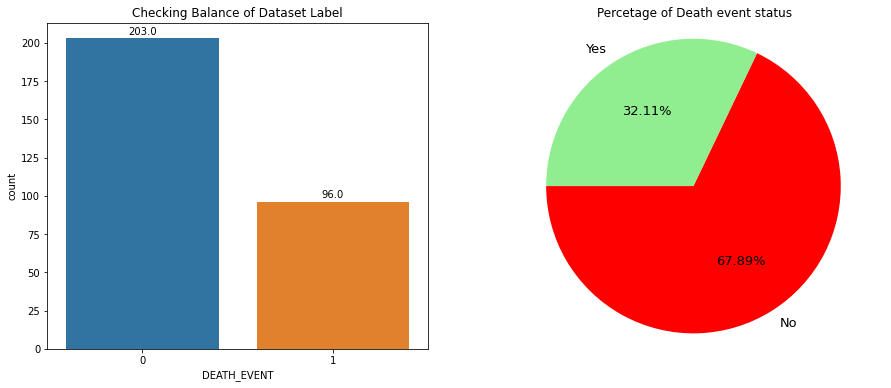

In [7]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='DEATH_EVENT', data=df)
for i in ax.patches:
     ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
        
plt.subplot(122)
plt.title("Percetage of Death event status")
death_event_size = df['DEATH_EVENT'].value_counts().values.tolist()
death_event_label = 'No','Yes'
colors = ['red','lightgreen']
pcs, texts, autotexts = plt.pie(death_event_size, labels=death_event_label,colors=colors,
                             autopct='%2.2f%%', startangle=180)
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)
    
plt.axis('equal')
plt.show()


Terlihat bahwa data pada column DEATH_EVENT tidak seimbang.

 ###### Visualisasi distribusi data dari variable Kontinu

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


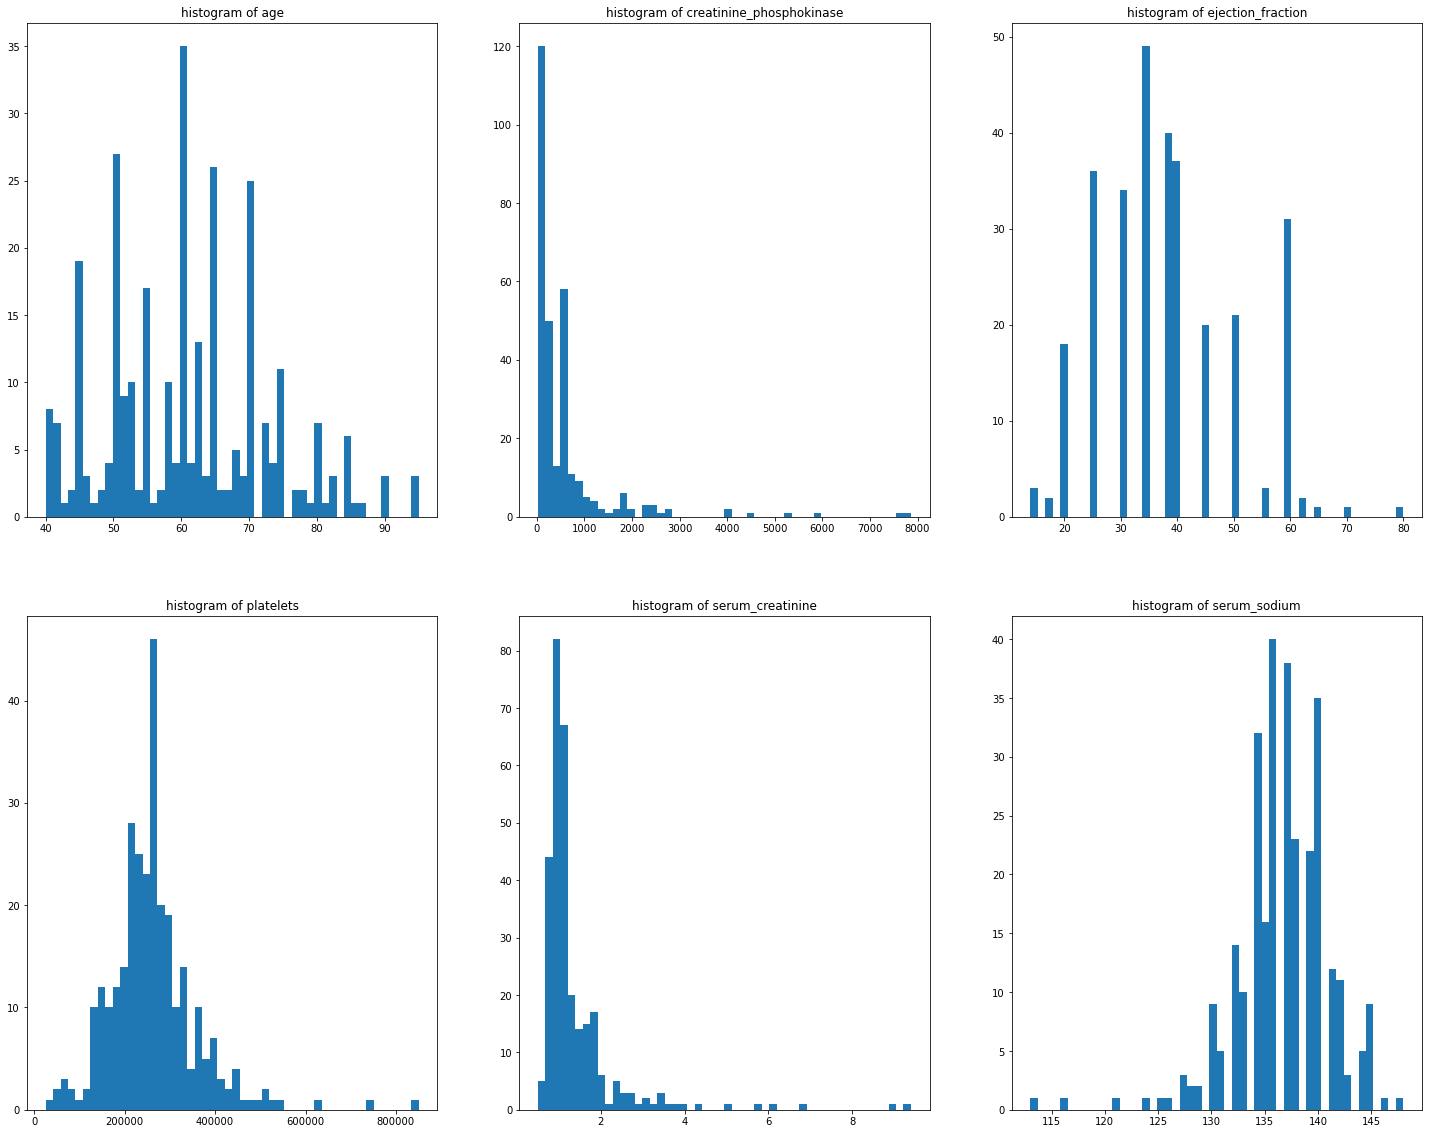

In [8]:
cols = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
print(cols)
fig, ax = plt.subplots(2,3, sharex=False, sharey=False, figsize=(25,20))
counts = 0
for col in cols:
    ax_x = counts//3
    ax_y = counts%3
    ax[ax_x, ax_y].hist(df[col],bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {col}")
    counts+=1
plt.show()

* Pada kolom sex dan DEATH_EVENT memiliki nilai 0 dan 1, oleh karena itu untuk memudahkan dalam visualisasi dan analisis data pada kolom sex diganti nilai 0 = Female, 1=Male sedangkan untuk kolom DEATH_EVENT diganti dengan 0=alive, 1= death. agar tidak merubah data asli maka diperlukan kolom tambahan untuk perubahan tersebut

In [9]:
df['gender'] = df['sex'].replace({1:'Male', 0:'Female'})
df['death_status'] = df['DEATH_EVENT'].replace({1:'Death', 0:'Alive'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,gender,death_status
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,Death
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,Death
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,Death
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,Death
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,Death


##### korelasi antara tiap variable kontinu

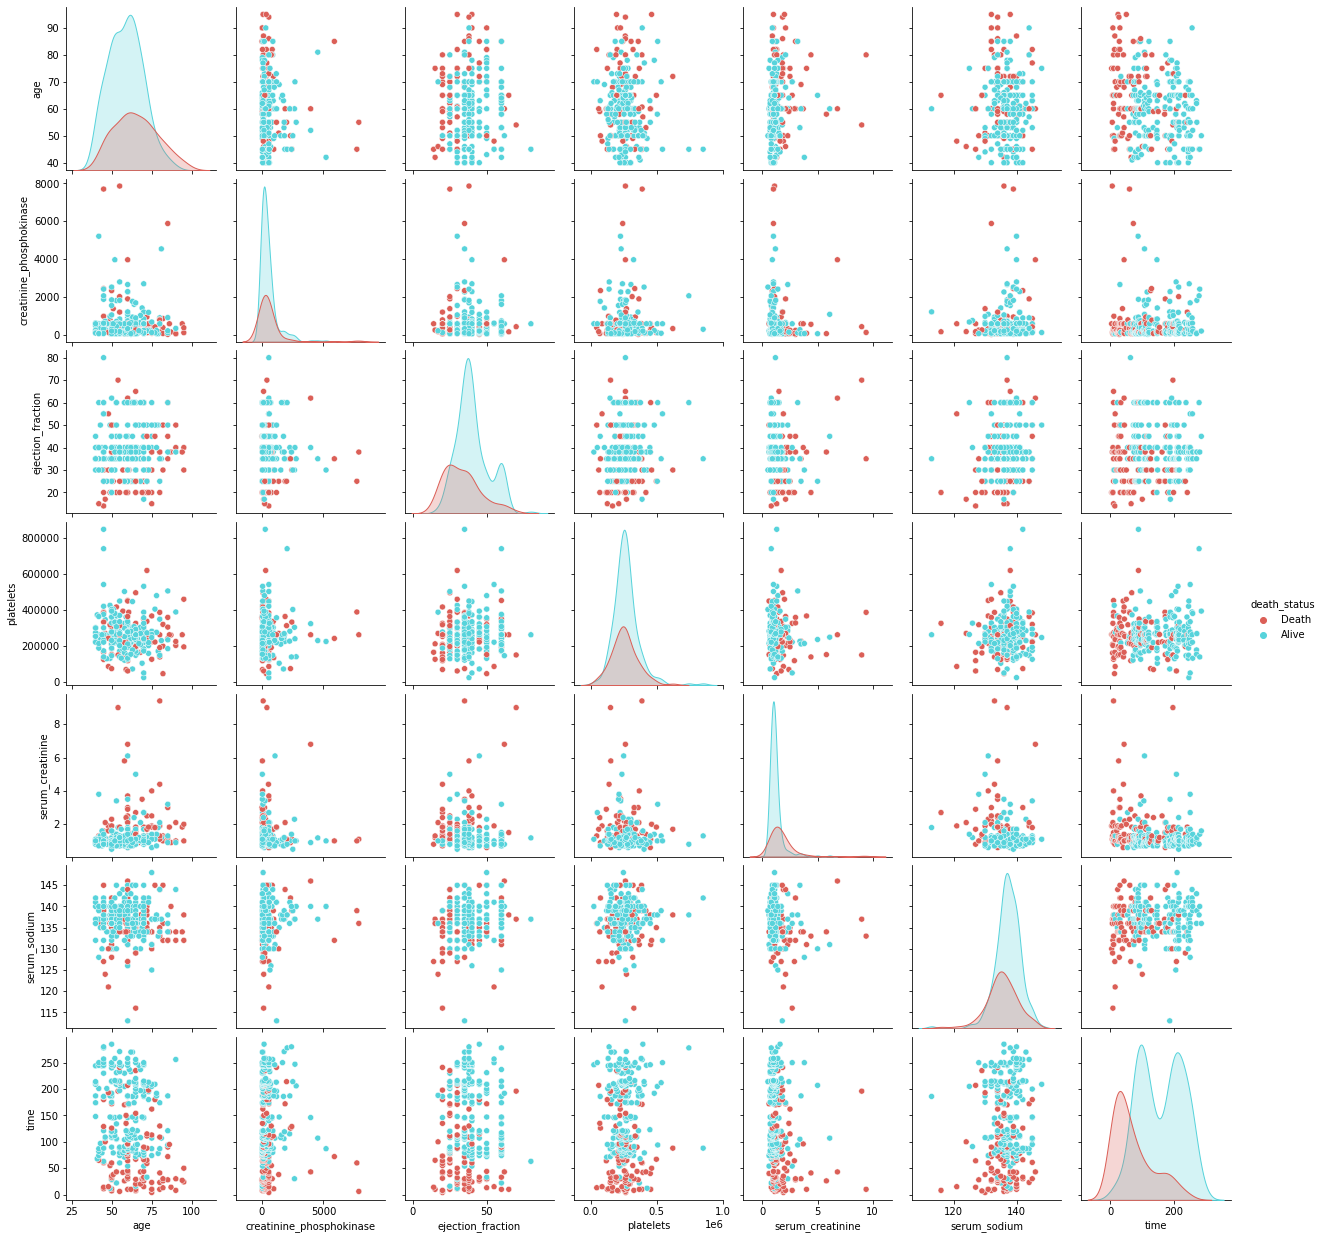

In [10]:
sns.pairplot(df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium',
                'time','death_status']], hue='death_status', diag_kind='kde', kind='scatter',palette='hls')
plt.show()

warna merah menunjukkan terjadinya kejadian kematian dan warna biru tidak menunjukkan adanya kejadian kematian. untuk variabel time dengan variabel yang lain, semakin tinggi waktu follow up (dalam hari) semakin tinggi pula tingkat status pasien yang masih hidup. selain itu, scatter plot dan density plot telah menunjukkan perbedaan yang cukup jelas antara data kejadian kematian dan tidak ada kejadian kematian. untuk penjelasan lebih akan dilakukan visualisasi menggunakan boxplot.

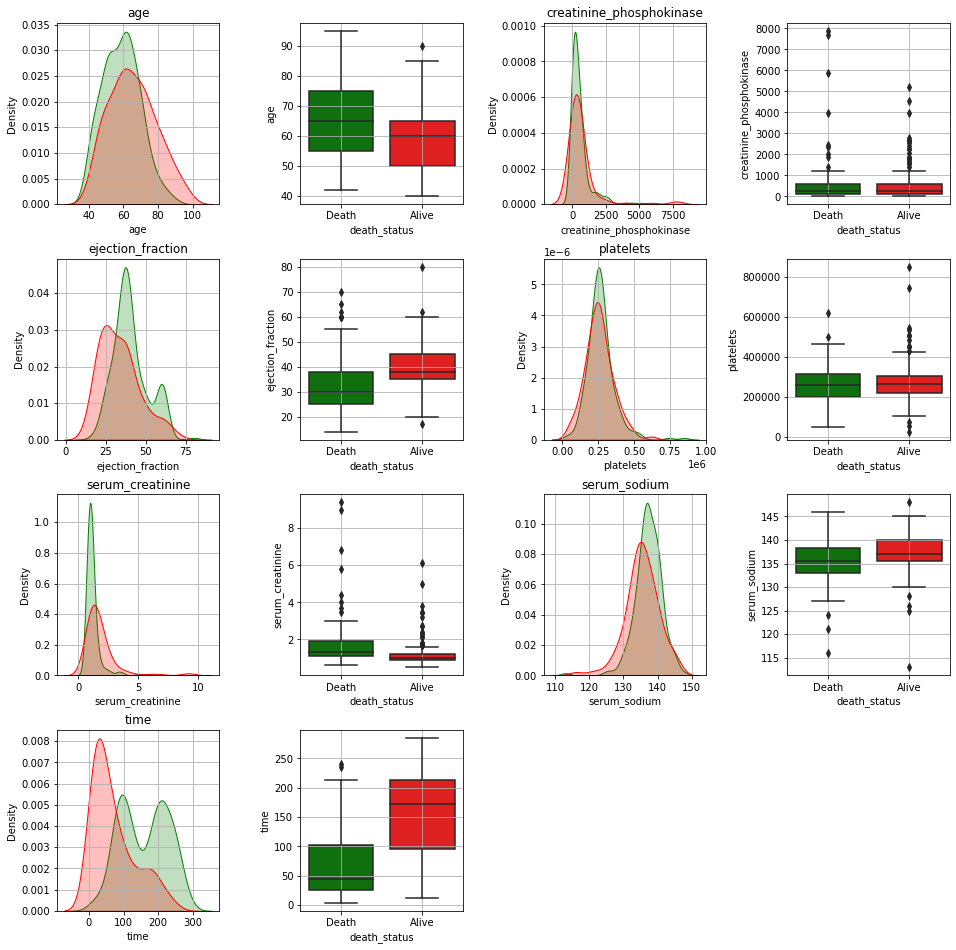

In [11]:
cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
plt.figure(figsize=(16,25))
for i, col in enumerate(cols):
    plt.subplot(6,4, i*2+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.3)
    plt.title(col)
    plt.grid()
    sns.kdeplot(df.loc[df['death_status']=='Alive',col],label='alive',color='green',shade=True)
    sns.kdeplot(df.loc[df['death_status']=='Death',col],label='dead',color='red', shade=True)
    plt.subplot(6,4,i*2+2)
    sns.boxplot(data=df,y=col,x='death_status', palette=['green','red'])
    plt.grid()
    

Terlihat pada visualisasi diatas bahwa tidak semua distribusi data adalah normal, beberapa data mengalami skewness dan terlihat adanya outliers

##### mencari mean dan median pada setiap variabel kontinu

In [12]:
mean_median_var = df.groupby('death_status')[cols].agg([np.mean,np.median])
mean_median_var

age        creatinine_phosphokinase         \
                   mean median                     mean median   
death_status                                                     
Alive         58.761906   60.0               540.054187  245.0   
Death         65.215281   65.0               670.197917  259.0   

             ejection_fraction             platelets            \
                          mean median           mean    median   
death_status                                                     
Alive                 40.26601   38.0  266657.489901  263000.0   
Death                 33.46875   30.0  256381.044792  258500.0   

             serum_creatinine        serum_sodium               time         
                         mean median         mean median        mean median  
death_status                                                                 
Alive                1.184877    1.0   137.216749  137.0  158.339901  172.0  
Death                1.835833    1.3   135.375000  135.5   70.885417   44.5

varibel time memiliki perbedaan yang cukup tinggi terhadap kejadian kematian

######  korelasi tekanan darah tinggi terhadap kejadian kematian berdasarkan gender

In [13]:
df.groupby(['gender','high_blood_pressure','death_status']).size().unstack().apply(lambda x: x/x.sum(), axis=1)

death_status                   Alive     Death
gender high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

terdapat beberapa perbedaan proporsi tetapi perbedaan tersebut lebih kepada kondisi tekanan darah tinggi daripada gender. untuk gender sendiri tidak terlalu memiliki pengaruh yang signifikan terhadap status kematian. Tingkat kematian untuk pasien dengan gender perempuan yang tidak memiliki tekanan darah tinggi sekitar 28% dan yang memiliki tekanan darah tinggi sekitar 39% sedangkan pada pasien laki-laki tingkat status kematian untuk pasien yang tidak mempunyai tekanan darah tinggi sekitar 30% dan yang mempunyai tekanan darah tinggi sekitar 36%. hal ini menunjukkan bahwa tekanan darah tinggi memiliki pengaruh yang signifikan terhadap status kematian.

##### eksplorasi binary variabel terhadap death_event


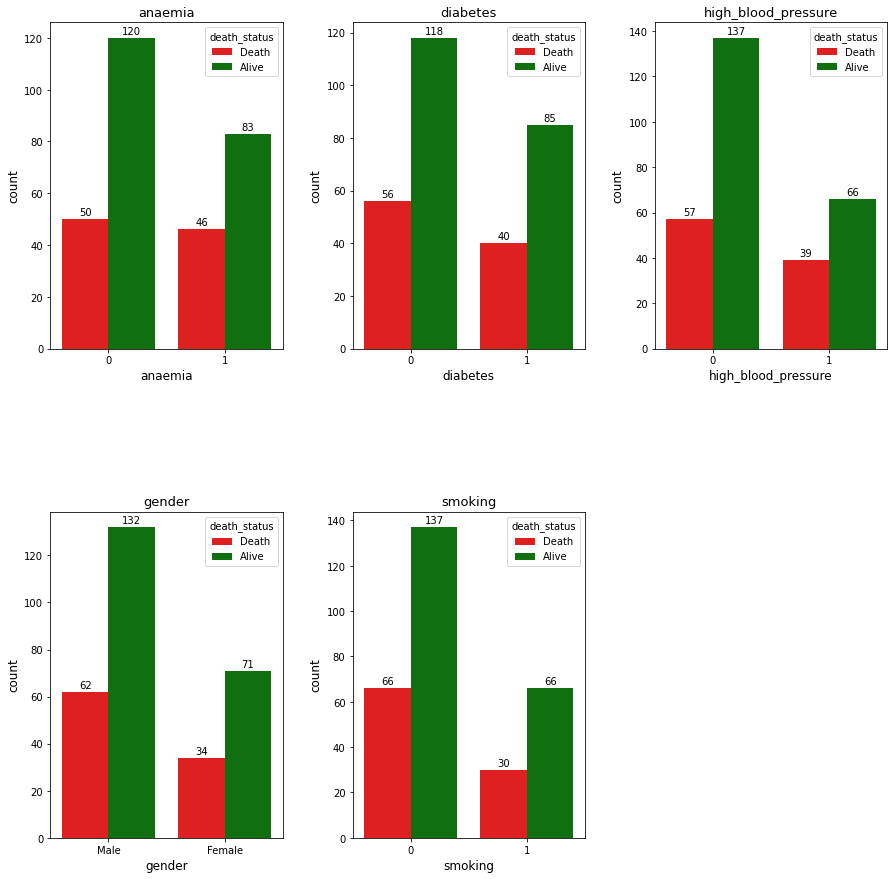

In [14]:
bin_var = ['anaemia','diabetes','high_blood_pressure','gender','smoking']
plt.figure(figsize=(15,15))
for i, col in enumerate(bin_var):
    plt.subplot(2,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    ax = sns.countplot(data=df, x=col, hue='death_status',palette=['red','green'])
    for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

Terlihat dengan jelas perbedaan jumlah kejadian kematian antara perbedaan status gender, tekanan darah tinggi, perokok, dan diabetes. dengan visualisasi data diatas juga menunjukkan distribusi data yang tidak seimbang pada jumlah pasien yang merokok atau tidak, gender laki-laki atau perempuan, pasien yang memiliki tekanan darah tinggi atau tidak. untuk mengetahui informasi dengan lebih jelas, mari lihat proporsi setiap varibael terhadap death_status.

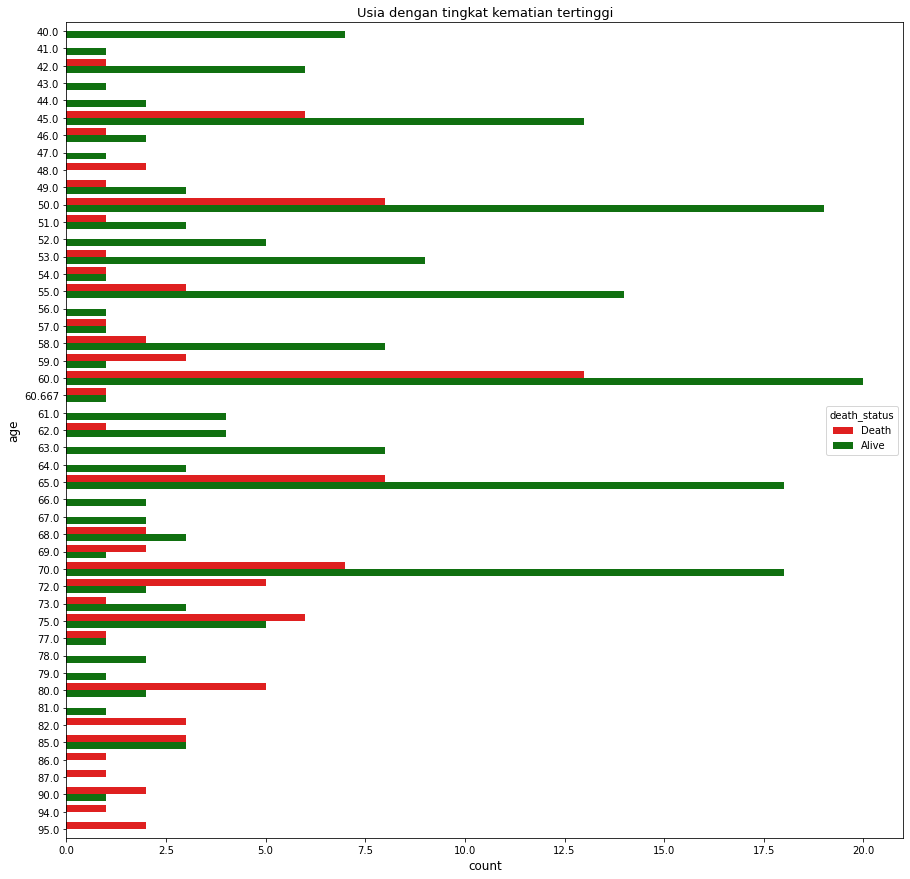

In [15]:
plt.figure(figsize=(15,15))
plt.title("Usia dengan tingkat kematian tertinggi", fontsize=13)
plt.xlabel("Age", fontsize=12)
plt.ylabel("count",fontsize=12)
ax = sns.countplot(data=df, y='age', hue='death_status',palette=['red','green'])


Usia pasien dengan status tingkat kematian tertinggi yaitu pasien dengan usia 60 tahun

In [16]:
for i, col in enumerate(bin_var):
    result=pd.crosstab(df[col],df['death_status']).apply(lambda z : z/z.sum(),axis=1)
    print("")
    print(result)


death_status     Alive     Death
anaemia                         
0             0.705882  0.294118
1             0.643411  0.356589

death_status     Alive     Death
diabetes                        
0             0.678161  0.321839
1             0.680000  0.320000

death_status            Alive     Death
high_blood_pressure                    
0                    0.706186  0.293814
1                    0.628571  0.371429

death_status     Alive     Death
gender                          
Female        0.676190  0.323810
Male          0.680412  0.319588

death_status     Alive     Death
smoking                         
0             0.674877  0.325123
1             0.687500  0.312500


* pasien yang memiliki anemia tingkat kematian lebih tinggi daripada yang tidak.
* proporsi tingkat kematian orang yang memiliki diabetes atau tidak, tidak ada perbedaan yang signifikan bahkan cenderung sama yaitu pada presentase 32%
* untuk pasien dengan tekanan darah tinggi seperti yang telah diuraikan diatas, pasien yang memiliki darah tinggi memiliki tingkat kejadian kematian yang tinggi dibanding dengan pasien yang tidak memiliki.
* status gender tidak mempengaruhi tingkat status kematian secara signifikan terhadap death event
* status pasien perokok atau tidak, juga tidak terlalu berpengaruh banyak terhadap death event

## Data Preprocessing

In [17]:
df = df.drop(columns=['gender','death_status'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [18]:
df.dropna()
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

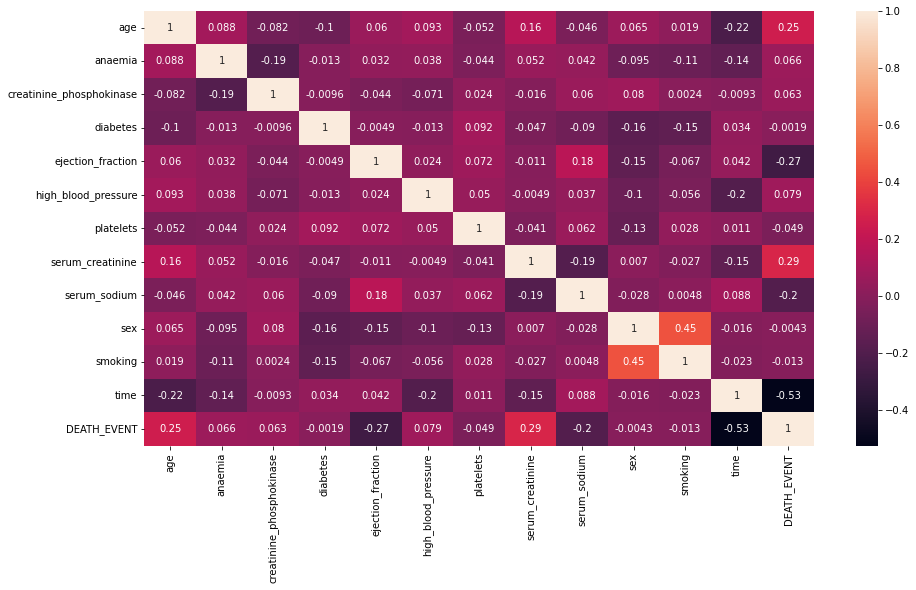

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### Drop fitur / variabel yang kurang berpengaruh terhadap DEATH_EVENT
seperti yang telah diuraikan diatas terdapat beberapa fitur yang kurang berpengaruh terhadap death_event seperti status diabetes, smoking dan sex.

In [20]:
df.drop(columns=['diabetes','smoking','sex'],axis=1, inplace=True)


In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time', 'DEATH_EVENT'],
      dtype='object')

###### Cek Skew

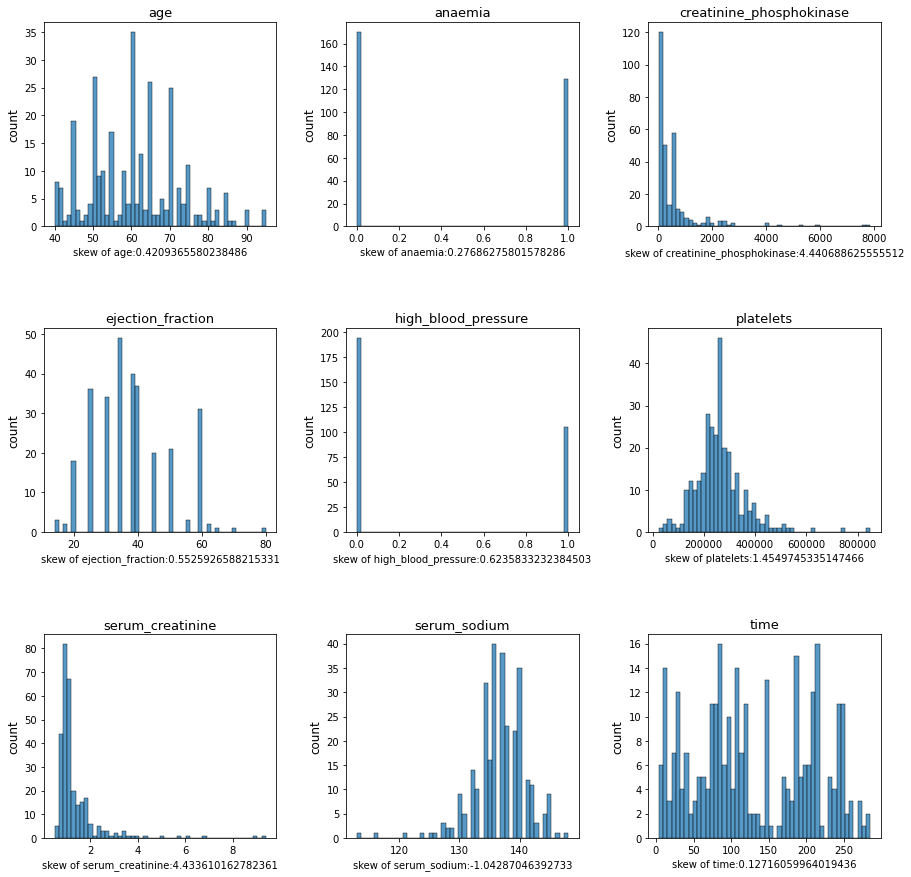

In [22]:
from scipy.stats import skew

cols = df.loc[:,df.columns!='DEATH_EVENT'].columns.tolist()
plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,palette=['red','green'])
 

* fitur age, anaemia, dan time memiliki distribusi yang cukup simetris dengan range nilai skew -0.5 to 0.5
* fitur high_blood_pressure memiliki distribusi yang sedikit mengalami skewness dengan nilai 0.6
* fitur creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium memiliki distribusi dengan tingkat skewness yang tinggi dengan range nilai skew < -1.0 and > 1.0

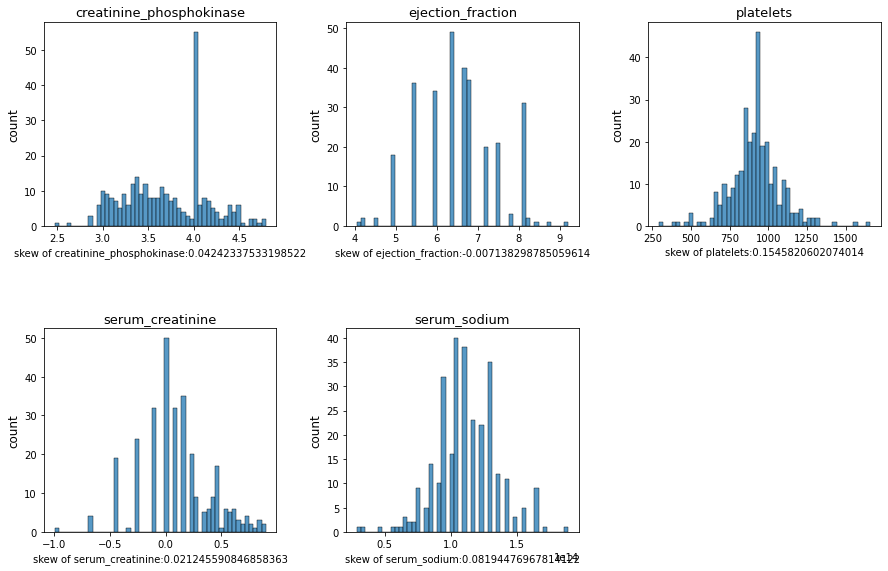

In [23]:
from scipy.stats import boxcox
postive = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium']
plt.figure(figsize=(15,15))
for i, col in enumerate(postive):
    df[col] = boxcox(df[col])[0]
    plt.subplot(3,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50)
 

setelah dilakukan transformasi menggunakan metode boxcox, distribusi data menjadi cukup simetris dengan range nilai skew sekitar -0.5 to 0.5

In [24]:
df

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,4.011877,4.898018,1,935.540540,0.475058,7.639653e+13,4,1
1,55.0,0,4.790978,6.666743,0,932.683294,0.090952,1.046115e+14,6,1
2,65.0,0,3.447415,4.898018,0,734.259071,0.231062,7.239550e+13,7,1
3,50.0,1,3.320114,4.898018,0,834.330337,0.475058,1.100888e+14,7,1
4,65.0,1,3.488730,4.898018,0,1037.504702,0.632279,3.454225e+13,8,1
...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,3.022089,6.666743,1,718.460239,0.090952,1.483958e+14,270,0
295,55.0,0,4.392797,6.666743,0,944.186147,0.166815,1.217839e+14,271,0
296,45.0,0,4.430194,8.153922,0,1552.455897,-0.249708,1.158100e+14,278,0
297,45.0,0,4.476891,6.666743,0,683.333908,0.286173,1.280198e+14,280,0


##### Splitting data to data training and data testing

In [25]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)


## Modeling and evaluation model

##### Prediction using Random Forest

In [26]:
RF = RandomForestClassifier(n_estimators=15, random_state=35)
RF.fit(X_train, y_train)
ypred = RF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,ypred))


Accuracy: 0.8


## Evaluation Model

In [27]:
print("Random Forest Model")
print("-------------------------------------------------------------")
print("Precision:",metrics.precision_score(y_test,ypred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,ypred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,ypred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,ypred))
print (metrics.classification_report(y_test, ypred))
print("-------------------------------------------------------------")


Random Forest Model
-------------------------------------------------------------
Precision: 0.9333333333333333
Recall: 0.7368421052631579
F Score: 0.8235294117647058
Confusion Matrix:
 [[14  5]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.67      0.91      0.77        11

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.80        30
weighted avg       0.84      0.80      0.80        30

-------------------------------------------------------------


## Percobaan correcting imbalanced dataset
Pada tahap awal visualisasi data terlihat bahwa dataset mengalami ketidakseimbangan data pada variabel target, maka dari itu pada tahap ini dilakukan percobaan menggunakan metode oversampling SMOTE untuk mendapatkan data yang seimbang

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Before oversampling: ",Counter(y))
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print("After oversampling: ",Counter(y_smote))
Xtrain_smote, Xtest_smote, ytrain_smote, ytest_smote = train_test_split(X_smote,y_smote,test_size=0.1, random_state=40)

# Random Forest
RF_smote = RandomForestClassifier(n_estimators=15, random_state=40)
RF_smote.fit(Xtrain_smote, ytrain_smote)
ypred_smote = RF_smote.predict(Xtest_smote)
print("Accuracy:",metrics.accuracy_score(ytest_smote,ypred_smote))
print("Confusion Matrix:\n",metrics.confusion_matrix(ytest_smote,ypred_smote))
print (metrics.classification_report(ytest_smote, ypred_smote))

Before oversampling:  Counter({0: 203, 1: 96})
After oversampling:  Counter({1: 203, 0: 203})
Accuracy: 0.8292682926829268
Confusion Matrix:
 [[18  3]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.84      0.80      0.82        20

    accuracy                           0.83        41
   macro avg       0.83      0.83      0.83        41
weighted avg       0.83      0.83      0.83        41



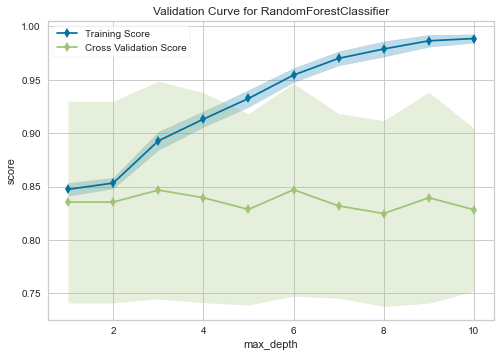

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20,
                estimator=RandomForestClassifier(n_estimators=15,
                                                 random_state=35),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [32]:
from yellowbrick.model_selection import validation_curve
print(validation_curve(RF, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

Visualisasi diatas menunjukkan bahwa model tanpa melakukan proses handling imbalanced data mengalami underfitting

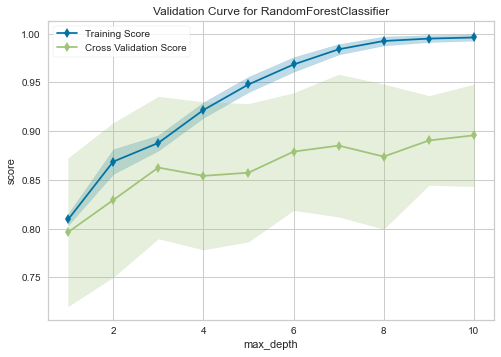

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20,
                estimator=RandomForestClassifier(n_estimators=15,
                                                 random_state=40),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [33]:
print(validation_curve(RF_smote, Xtrain_smote, ytrain_smote, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

Dapat dilihat bahwa training score dan cross validation score tidak terlalu overfitting maupun underfitting

In [34]:
RF.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [35]:
RF_smote.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [36]:
print(X_test[:10]) 

      age  anaemia  creatinine_phosphokinase  ejection_fraction  \
45   50.0        0                  4.011877           6.666743   
83   79.0        1                  2.967618           7.535331   
4    65.0        1                  3.488730           4.898018   
76   70.0        0                  3.229672           8.153922   
80   70.0        0                  3.085766           6.823607   
115  58.0        1                  3.870799           6.823607   
61   50.0        0                  3.780274           6.823607   
272  67.0        0                  3.614034           6.666743   
219  55.0        0                  4.011877           6.420312   
101  75.0        0                  4.011877           7.193238   

     high_blood_pressure    platelets  serum_creatinine  serum_sodium  time  
45                     0  1010.605533          0.475058  9.936922e+13    35  
83                     1   756.237834          0.445636  8.955634e+13    78  
4                      0  10

In [37]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time', 'DEATH_EVENT'],
      dtype='object')

In [38]:
RF.predict([[55.0,0,4.790978,6.666743,0,932.683294,0.090952,1.046115e+14,6]])

array([1], dtype=int64)

In [39]:
RF_smote.predict([[55.0,0,4.790978,6.666743,0,932.683294,0.090952,1.046115e+14,6]])

array([1], dtype=int64)

In [40]:
RF.predict([[62.0,0,3.022089,6.666743,1,718.460239,0.090952,1.483958e+14,270]])

array([0], dtype=int64)

In [41]:
RF_smote.predict([[62.0,0,3.022089,6.666743,1,718.460239,0.090952,1.483958e+14,270]])

array([0], dtype=int64)

In [42]:
RF.predict([[75.0,0,4.011877,7.193238,1,932.683294,0.152666,1.100888e+14,87]])

array([0], dtype=int64)

In [43]:
RF_smote.predict([[75.0,0,4.011877,7.193238,1,932.683294,0.152666,1.100888e+14,87]])

array([0], dtype=int64)

In [44]:
RF.predict([[50, 0,8,7,1,345,2,4,13]])

array([1], dtype=int64)

In [45]:
import pickle
pickle.dump(RF_smote, open('./RF_model_predict2','wb'))

## Conclusion

Dataset ini tidak terdapat missing values, nilai duplikat maupun invalid data. Pada variable target (DEATH_EVENT) mengalami ketidakseimbangan data dengan presentase data 32.11% status kematian dan 67.89% status masih hidup. Pada proses eksplorasi data, variabel time memiliki pengaruh yang cukup signifikan hal ini dikarenakan semakin tinggi waktu follow up (time) semakin rendah perkiraan pasien mengalami kejadian kematian. Usia dengan tingkat kejadian kematian tertinggi yaitu pada usia 60 tahun. Pada variabel binary seperti status anemia, diabetes, tekanan darah tinggi, gender dan merokok dihasilkan seperti berikut :
* pasien yang memiliki anemia tingkat kematian lebih tinggi daripada yang tidak.
* proporsi tingkat kematian orang yang memiliki diabetes atau tidak, tidak ada perbedaan yang signifikan bahkan cenderung sama yaitu pada presentase 32%
* untuk pasien dengan tekanan darah tinggi seperti yang telah diuraikan diatas, pasien yang memiliki darah tinggi memiliki tingkat kejadian kematian yang tinggi dibanding dengan pasien yang tidak memiliki.
* status gender tidak mempengaruhi tingkat status kematian secara signifikan terhadap death event
* status pasien perokok atau tidak, juga tidak terlalu berpengaruh banyak terhadap death event

dari pernyataan diatas dapat disimpulkan bahwa variabel diabetes, smoking, dan sex(gender) kurang berpengaruh secara signifikan terhadap death_event. maka dari itu variabel-variabel tersebut didrop. pada prepocessing data tidak dilakukan scaling data, hal itu dikarenakan algoritma yang berdasar pada tree seperti decision tree dan random forest tidak banyak terpengaruh oleh transformasi monotonic dimana scaling merupakan transformasi monotonic. Setelah dilakukan modeling menggunakan algoritma Random Forest didapatkan akurasi sebesar 87%. Pada tahap awal visualisasi data terlihat bahwa dataset mengalami ketidakseimbangan data pada variabel target, maka dari itu dilakukan percobaan menggunakan metode oversampling SMOTE untuk mendapatkan data yang seimbang. Setelah dilakukan precobaan oversampling dengan menggunakan algoritma yang sama yaitu Random Forest didapatkan akurasi sebesar 0.895 / 90%. Untuk perbandingan Precision, Recall, Fscore rata-rata nilai lebih bagus after oversampling.


